In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import seaborn as sns

from utils import decorate, savefig

# random seed
np.random.seed(11)

# set node colors
colors = sns.color_palette('pastel', 8)
sns.set_palette(colors)

## Directed graph excercise

Add another node and a few more edges to the given directed graph.

In [3]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes to directed graph
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')
G.add_node('Diane')

# Add edges
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')
G.add_edge('Chuck', 'Alice')
G.add_edge('Chuck', 'Diane')
G.add_edge('Diane', 'Bob')

In [4]:
# Check nodes
list(G.nodes())

['Alice', 'Bob', 'Chuck', 'Diane']

In [5]:
# Check edges between nodes
list(G.edges())

[('Alice', 'Bob'),
 ('Alice', 'Chuck'),
 ('Bob', 'Alice'),
 ('Bob', 'Chuck'),
 ('Chuck', 'Alice'),
 ('Chuck', 'Diane'),
 ('Diane', 'Bob')]

C:\Users\Carlo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Carlo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


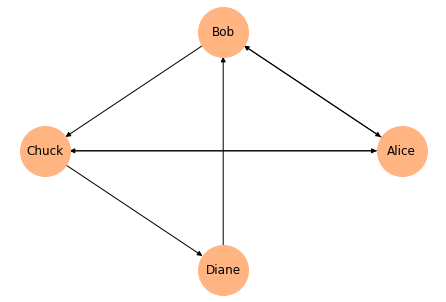

In [6]:
# Drawing the graph
nx.draw_circular(G, 
                 node_color = 'C1',
                 node_size = 2500,
                 with_labels = True)

## Undirected graph excercise
Add another city and atleast one edge to the sample graph

In [7]:
# Define the dictionary of coordinates for each city
positions = {'Albany': (-74, 43), 
             'Boston': (-71, 42),
             'NYC': (-74, 41),
             'Philly': (-75, 40),
             'Cleveland': (-80, 40.5)
            }
positions['Albany']

(-74, 43)

We use the keys in positions to create an undirected graph.

In [8]:
G = nx.Graph()
G.add_nodes_from(positions)
list(G.nodes())

['Albany', 'Boston', 'NYC', 'Philly', 'Cleveland']

Create the `drive_times` dictionary.

In [9]:
drive_times = {('Albany', 'Boston') : 3,
               ('Albany', 'NYC') : 4,
               ('Albany', 'Cleveland'): 9,
               ('Boston', 'NYC') : 4,
               ('NYC', 'Philly'): 2,
               ('NYC', 'Cleveland'): 5,
               ('Philly', 'Cleveland'): 6}

In [10]:
G.add_edges_from(drive_times)
list(G.edges())

[('Albany', 'Boston'),
 ('Albany', 'NYC'),
 ('Albany', 'Cleveland'),
 ('Boston', 'NYC'),
 ('NYC', 'Philly'),
 ('NYC', 'Cleveland'),
 ('Philly', 'Cleveland')]

Now we can draw the new graph using `positions` and `drive_times`.

{('Albany', 'Boston'): Text(-72.5, 42.5, '3'),
 ('Albany', 'NYC'): Text(-74.0, 42.0, '4'),
 ('Albany', 'Cleveland'): Text(-77.0, 41.75, '9'),
 ('Boston', 'NYC'): Text(-72.5, 41.5, '4'),
 ('NYC', 'Philly'): Text(-74.5, 40.5, '2'),
 ('NYC', 'Cleveland'): Text(-77.0, 40.75, '5'),
 ('Philly', 'Cleveland'): Text(-77.5, 40.25, '6')}

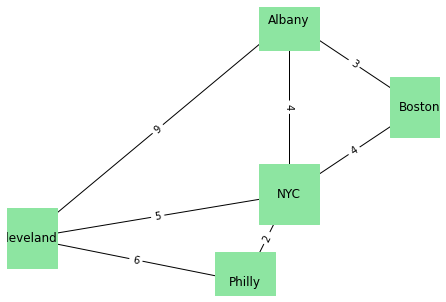

In [66]:
nx.draw(G, positions,
       node_color = 'C2',
       node_size = 3500,
       node_shape = 's',
       with_labels = True)

nx.draw_networkx_edge_labels(G, positions, edge_labels = drive_times)

## Complete Graph Excercise

Make and draw complete directed graph with 5 nodes.

We use a generator function that iterates through all pairs of nodes.

In [14]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i!=j:
                yield u, v

Since we want to create a directed graph, we modify the condition `if i<j` to `if i!=j` to give all symmetric pairing but excluding pairs consisting of the same node. We then check the result of this function for `5` nodes:

In [15]:
list(all_pairs(range(5)))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 0),
 (2, 1),
 (2, 3),
 (2, 4),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 4),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3)]

Using an input of `5`, we see that we get node pairings of `(0,1)` and `(1,0)` and so on.

We can then create a complete directed graph with `n` nodes by using the edges generated by the `all_pairs` function.

In [16]:
def make_complete_graph(n):
    G = nx.DiGraph() #Directed graph
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

In [17]:
complete = make_complete_graph(5)

Drawing the complete directed graph with 5 nodes:

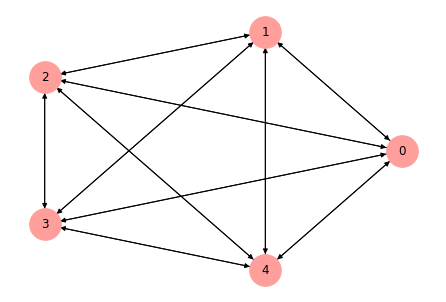

In [126]:
nx.draw_circular(complete,
                 node_color = 'C3',
                 node_size = 1000,
                 with_labels = True)

In this complete directed graph, all nodes are symmetrically connected to all other nodes.

## Random Graphs Excercise
What do you think it means for a directed graph to be connected? 

**Answer:** I think that a directed graph can be considered connected if there is a path from each node to every other node considering the direction of each edge. 

Write a function that checks whether a directed graph is connected.

We start by creating random directed graph so we can check the function we will write. We will also be using the `flip` helper function to decide if an edge between nodes will exist.

In [18]:
def flip(p):
    return np.random.random() < p

`random_directed_pairs` will generate the pairs of nodes with random probability `p`.

In [19]:
def random_directed_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

`make_random_graph` will create a random directed graph with directed edges having the probability `p`.

In [20]:
def make_random_graph(n, p):
    G = nx.DiGraph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_directed_pairs(nodes,p))
    return G

We then create and plot the random directed graph.

In [21]:
np.random.seed(29)
random_graph = make_random_graph(10, 0.2)

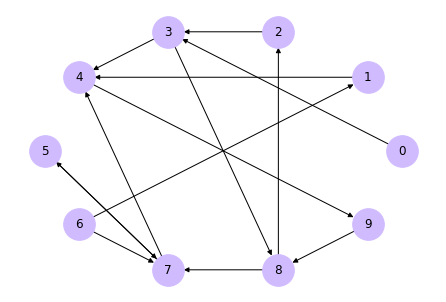

In [199]:
nx.draw_circular(random_graph,
                node_color = 'C4',
                node_size = 1000,
                with_labels = True)

  We then want to find all the nodes which can be reached starting from a given node using the `reachable_nodes` function.

In [200]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In [201]:
reachable_nodes(random_graph, 0)

{0, 2, 3, 4, 5, 7, 8, 9}

We then use `reachable_nodes` to check if the graph is connected:

In [205]:
def is_connected(G):
    start = list(G)[0]
    reach = reachable_nodes(G, start)
    return len(reach) == len(G)

In [206]:
is_connected(random_graph)

False

The difference in the connectivity of directed versus non directed random graphs lies in the probability `p` of each edge. If `p` is too low such that symmetric edges are very few, there is a much lower chance that the random directed graph will be connected compared to a similar undirected random graph with the same number of nodes and edges.